# Lab 4: Working with 'real' data
#### Aidan Berres
#### Physics 434
#### 11/1/20

In [122]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import h5py
plt.rcParams["figure.figsize"] = (11,8.5)

In [3]:
hf = h5py.File('gammaray_lab4.h5', 'r')
hf.keys()

<KeysViewHDF5 ['data']>

In [4]:
data = np.array(hf.get('data'))

In [5]:
data[:,0]

array([9.40680016e+08, 3.15000000e+02, 4.50000000e+01, 1.00000000e+01])

In [6]:
hf.close()

The columns are:

0. time (in gps seconds), 
1. Solar phase (deg) showing the position of the sun relative to the orbit, 
2. Earth longitude (deg) giving the position of the spacecraft relative to the ground, 
3. and particle counts.

## Problem #1
Here we looking at data from a low Earth Orbiting Gamma-ray detecting satellite which has about 25 million rows of data. We are looking for things like signal contamination, discontinuities in the data, and model backgrounds.
## 1)
Since we have so many data points I will be sampling every 100000th data point from the overall set to analyze any trends that I see.

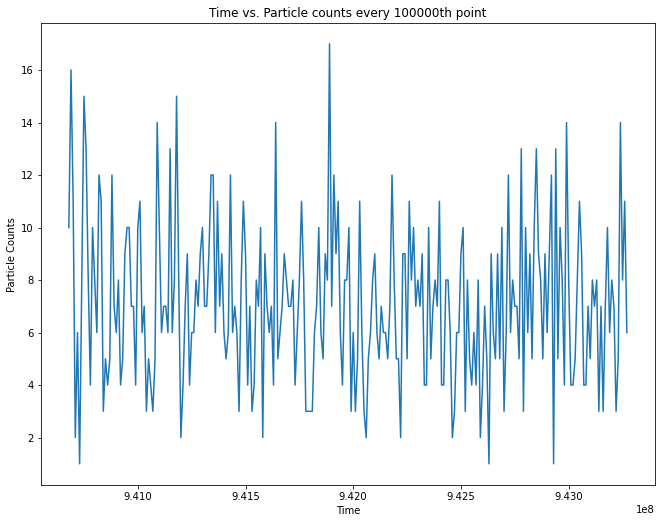

In [123]:
plt.plot(data[0][::100000], data[3][::100000])
plt.title('Time vs. Particle counts every 100000th point')
plt.xlabel('Time')
plt.ylabel('Particle Counts');

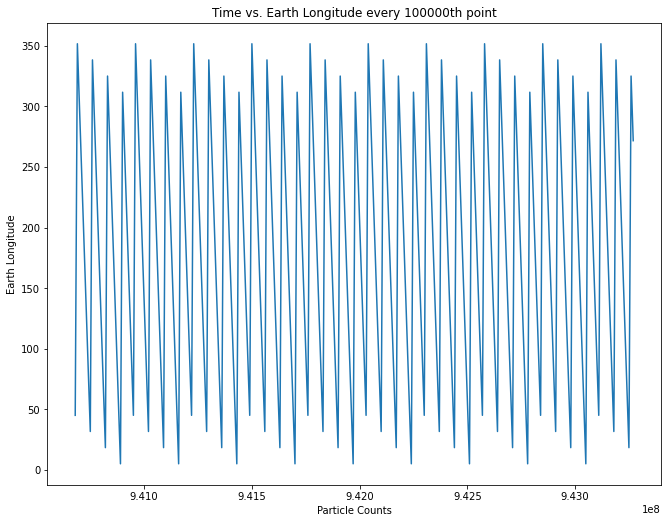

In [124]:
plt.plot(data[0][::100000], data[2][::100000])
plt.title('Time vs. Earth Longitude every 100000th point')
plt.xlabel('Particle Counts')
plt.ylabel('Earth Longitude');

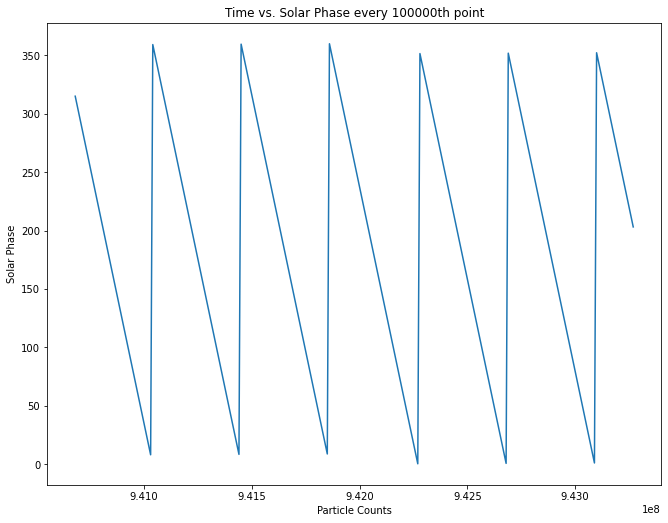

In [125]:
plt.plot(data[0][::100000], data[1][::100000])
plt.title('Time vs. Solar Phase every 100000th point')
plt.xlabel('Particle Counts')
plt.ylabel('Solar Phase');

As we can see that the gamma counts have a random placements when it comes to time dependence, whereas when it comes to the relative Sun phases and Earth longitudes we see an almost triangle wave form when we look at every 100000th point. For the Time vs. Earth Longitude plot we see the the values seem to go down from a peak and then rise up again, similar to a long triangle wave. We see for the Time vs. Solar Longitude plot that the values represent a triangle wave with a peak at 360 and a low at 0, which show its 360 degree intervals similar to the Earth Longitudes. We can find a workable background pdf() by using a Poisson distribution and using an average from a slice of particle count data for a certain time.
## 2)
For this part we are taking a sampling of points from the dataset to show that the background of the data may or may not be continuous. 

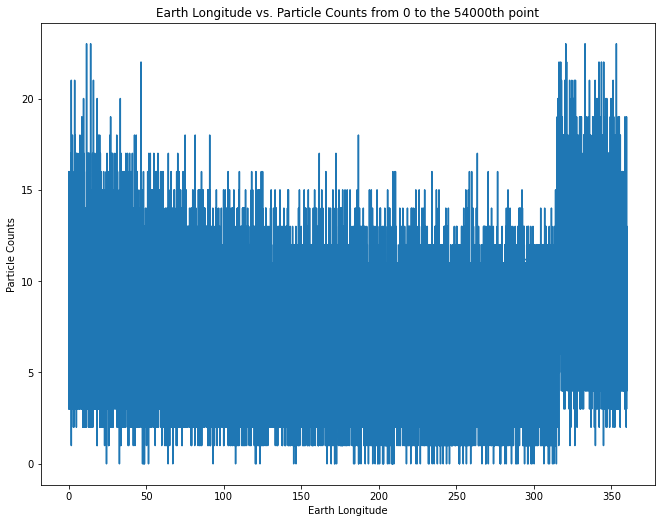

In [126]:
plt.plot(data[2][:54000],data[3][:54000])
plt.title('Earth Longitude vs. Particle Counts from 0 to the 54000th point')
plt.xlabel('Earth Longitude')
plt.ylabel('Particle Counts');

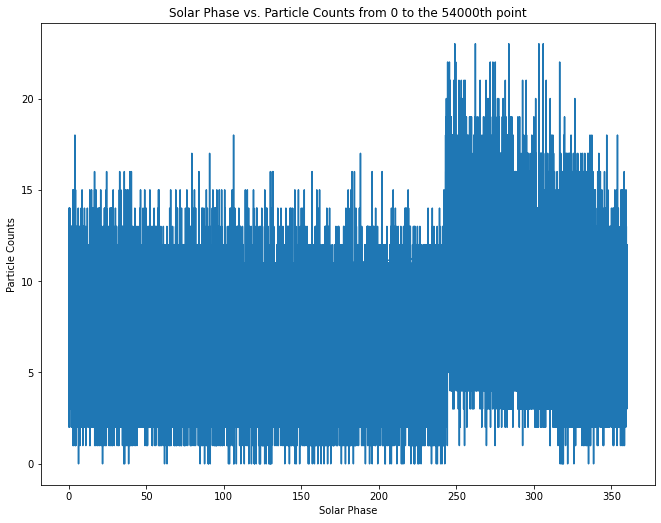

In [127]:
plt.plot(data[1][:54000],data[3][:54000])
plt.title('Solar Phase vs. Particle Counts from 0 to the 54000th point')
plt.xlabel('Solar Phase')
plt.ylabel('Particle Counts');

We can see that there is a discontinuity with the solar phase at around phase number 250, and with the Earth longitude we see a discontinutiy in the background at a longitude of around 325. At both of these points we see a jump in the number of particle counts which definitely changes the background distribution. These jumps are most likely caused by These jumps in our data mean that our background is time dependent.

## 3)

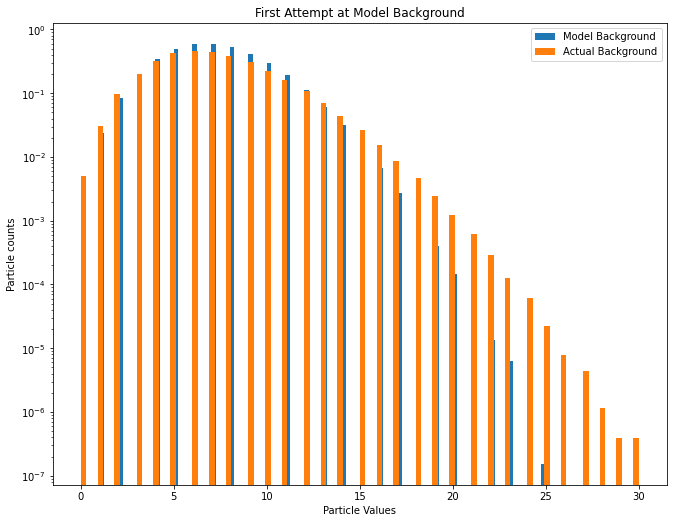

In [154]:
fig,ax=plt.subplots(1,1,figsize=(11,8.5))
mu1=np.mean(data[3][::100000])
d1=stats.poisson.rvs(mu=mu1,size=len(data[2]))
plt.yscale('log')
ax.hist(d1,bins=100,density=True,label='Model Background');
ax.hist(data[3],bins=100,density=True,label='Actual Background');
ax.set_title('First Attempt at Model Background')
ax.set_xlabel('Particle Values')
ax.set_ylabel('Particle counts')
ax.legend(loc=0);

This model is not good since we have the discontinuity at the points specified above. If we incorporate time dependence in the form of modeling the background of each discontinuity slice. We thus show we can pinpoint where the discontinuites are and separate the values accordingly,

In [40]:
dfix1=[]
tf1=[]
dfix2=[]
tf2=[]
for i in range(len(data[1][:54000])):
    if data[2][i]<315:
        dfix1.append(data[2][i])
        tf1.append(data[3][i])
    else:
        dfix2.append(data[2][i])
        tf2.append(data[3][i])

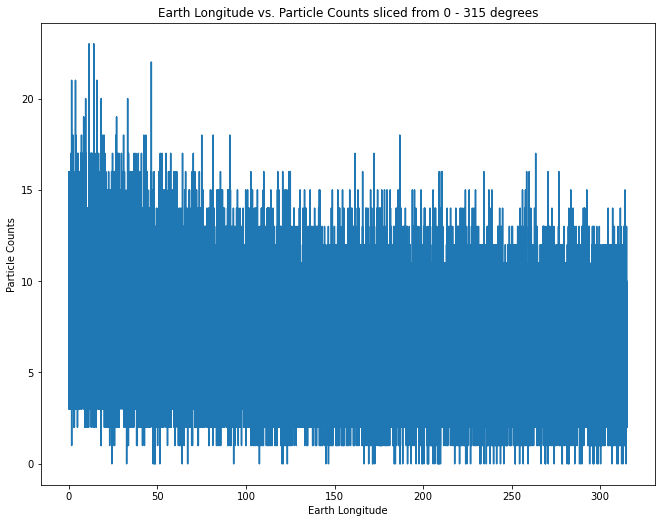

In [128]:
plt.plot(dfix1,tf1)
plt.title('Earth Longitude vs. Particle Counts sliced from 0 - 315 degrees')
plt.xlabel('Earth Longitude')
plt.ylabel('Particle Counts');

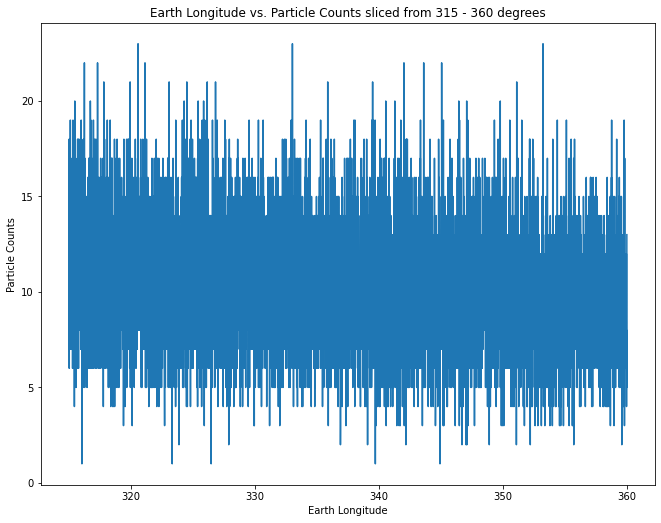

In [129]:
plt.plot(dfix2,tf2)
plt.title('Earth Longitude vs. Particle Counts sliced from 315 - 360 degrees')
plt.xlabel('Earth Longitude')
plt.ylabel('Particle Counts');

In [70]:
dfix3=[]
tf3=[]
dfix4=[]
tf4=[]
for i in range(len(data[1][:54000])):
    if data[1][i]<245:
        dfix3.append(data[1][i])
        tf3.append(data[3][i])
    else:
        dfix4.append(data[1][i])
        tf4.append(data[3][i])

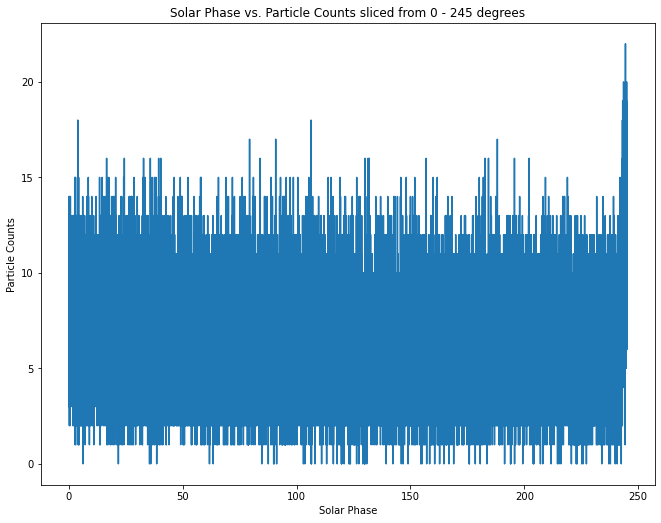

In [130]:
plt.plot(dfix3,tf3)
plt.title('Solar Phase vs. Particle Counts sliced from 0 - 245 degrees')
plt.xlabel('Solar Phase')
plt.ylabel('Particle Counts');

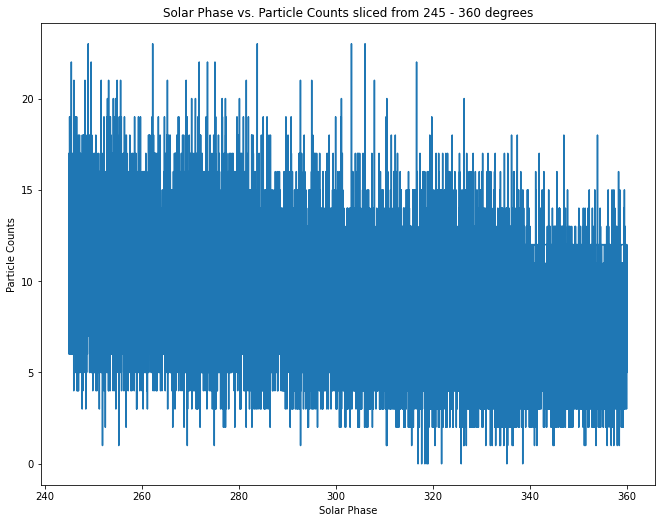

In [131]:
plt.plot(dfix4,tf4)
plt.title('Solar Phase vs. Particle Counts sliced from 245 - 360 degrees')
plt.xlabel('Solar Phase')
plt.ylabel('Particle Counts');

Now we can make individual models of the background by generating Poisson distributions using the average from the discontinuity slice. This will make our model more accurate than before since we have incorporated time dependence.

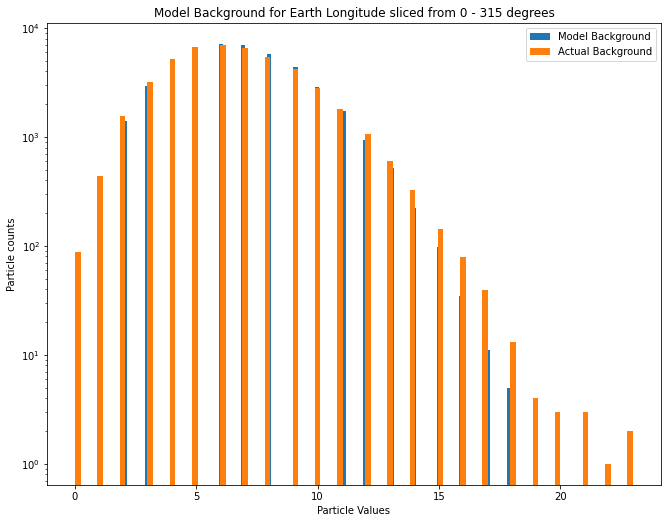

In [137]:
fig,ax=plt.subplots(1,1,figsize=(11,8.5))
mu2=np.mean(tf1)
c = stats.poisson.rvs(mu=mu2,size=len(tf1))
plt.yscale('log')
ax.hist(c,bins=100,label='Model Background')
ax.hist(tf1,bins=100, label='Actual Background')
ax.set_title('Model Background for Earth Longitude sliced from 0 - 315 degrees')
ax.set_xlabel('Particle Values')
ax.set_ylabel('Particle counts')
ax.legend(loc=0);

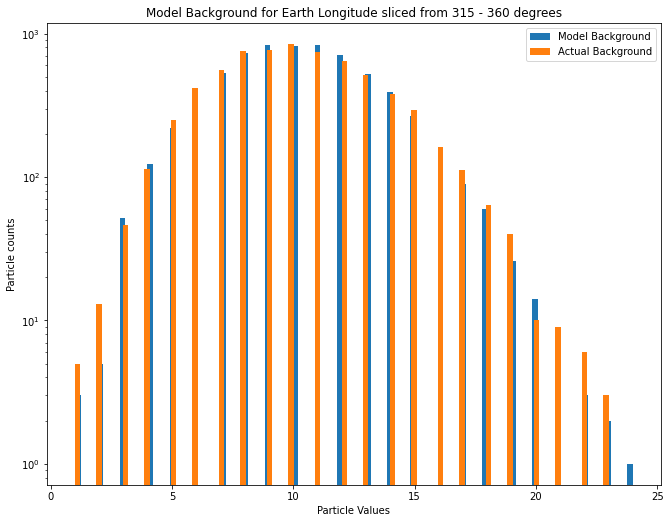

In [138]:
fig,ax=plt.subplots(1,1,figsize=(11,8.5))
mu3=np.mean(tf2)
c = stats.poisson.rvs(mu=mu3,size=len(tf2))
plt.yscale('log')
ax.hist(c,bins=100, label ='Model Background')
ax.hist(tf2,bins=100,label='Actual Background')
ax.set_title('Model Background for Earth Longitude sliced from 315 - 360 degrees')
ax.set_xlabel('Particle Values')
ax.set_ylabel('Particle counts')
ax.legend(loc=0);

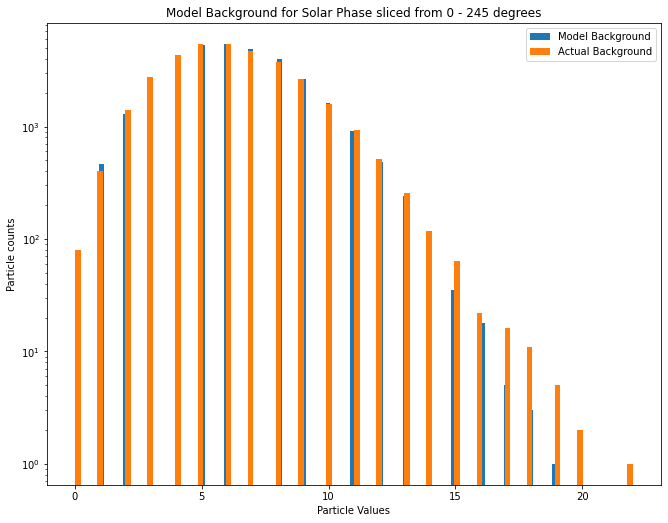

In [140]:
fig,ax=plt.subplots(1,1,figsize=(11,8.5))
mu2=np.mean(tf3)
c = stats.poisson.rvs(mu=mu2,size=len(tf3))
plt.yscale('log')
ax.hist(c,bins=100,label='Model Background')
ax.hist(tf3,bins=100,label='Actual Background')
ax.set_title('Model Background for Solar Phase sliced from 0 - 245 degrees')
ax.set_xlabel('Particle Values')
ax.set_ylabel('Particle counts')
ax.legend(loc=0);

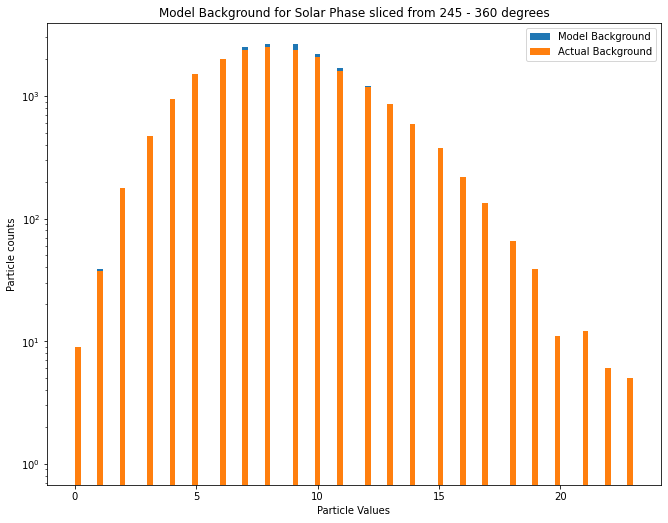

In [141]:
fig,ax=plt.subplots(1,1,figsize=(11,8.5))
mu2=np.mean(tf4)
c = stats.poisson.rvs(mu=mu2,size=len(tf4))
plt.yscale('log')
ax.hist(c,bins=100,label='Model Background')
ax.hist(tf4,bins=100,label='Actual Background')
ax.set_title('Model Background for Solar Phase sliced from 245 - 360 degrees')
ax.set_xlabel('Particle Values')
ax.set_ylabel('Particle counts')
ax.legend(loc=0);

We see that our models fit the data well, with only a few problems towards the end of the distributions on the right. Some of the models seem to have greater counts towards higher Particle Values.
## 4)
We can find the 5-sigma threshold for each discontinuity with our model distributions pdf. Since we can find the average of the Poisson we can easily find the ppf of each distribution. We are using Earth Longitude vs. Particle Counts slices to see how the significant detections changes with each slice.

In [156]:
siggy5 = 1 - stats.norm.cdf(5)
p1 = stats.poisson.ppf(1-siggy5,mu=np.mean(tf1))
p2 = stats.poisson.ppf(1-siggy5,mu=np.mean(tf2))
print(f'For Earth Longitude sliced from 0 - 315 degrees as significant detection is {p1} Counts')
print(f'For Earth Longitude sliced from 315 - 360 degrees as significant detection is {p2} Counts')

For Earth Longitude sliced from 0 - 315 degrees as significant detection is 23.0 Counts
For Earth Longitude sliced from 315 - 360 degrees as significant detection is 30.0 Counts


We see that the sigma threshold increases with the discontinuity at 315 degrees. The lower discontinuity only needs 23 counts for a significant detection, whereas the upper discontinuity needs 30 counts for a significant detection.
## Problem #2
Here we are going to look at simulated telescope images in which we are going to find discontinuities or contaminated data in our backgrounds.
## 1)
Here we review our 10 images,

In [162]:
hf = h5py.File('images.h5', 'r') # import data
hf.keys()
data2 = np.array(hf.get('imagestack'))
hf.close() # close file

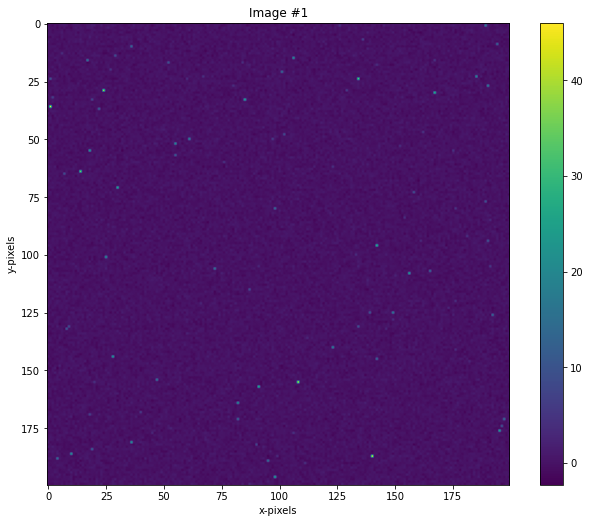

In [158]:
plt.imshow(data2[:,:,0])
plt.title('Image #1')
plt.xlabel('x-pixels')
plt.colorbar()
plt.ylabel('y-pixels');

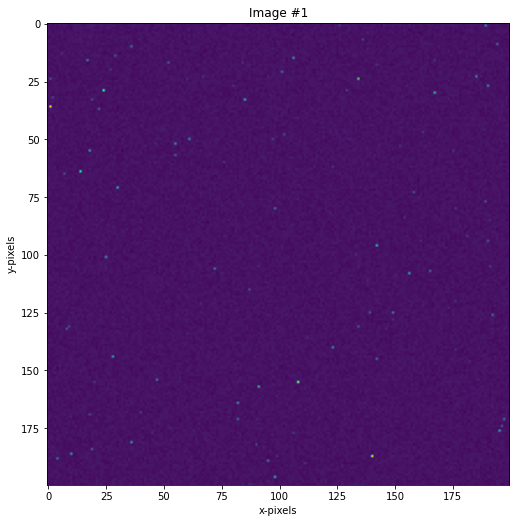

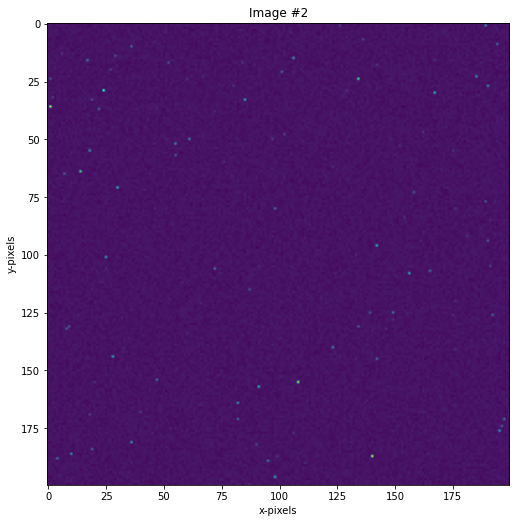

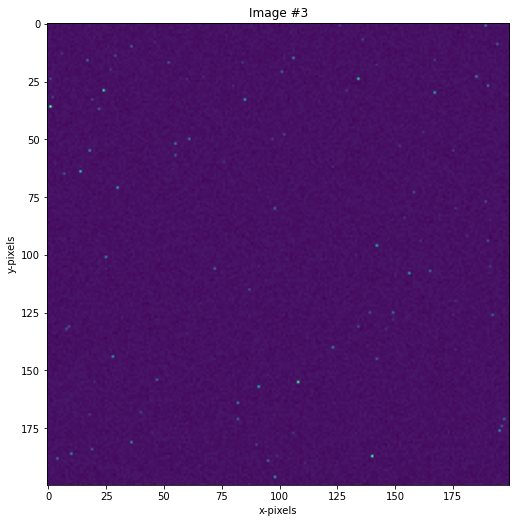

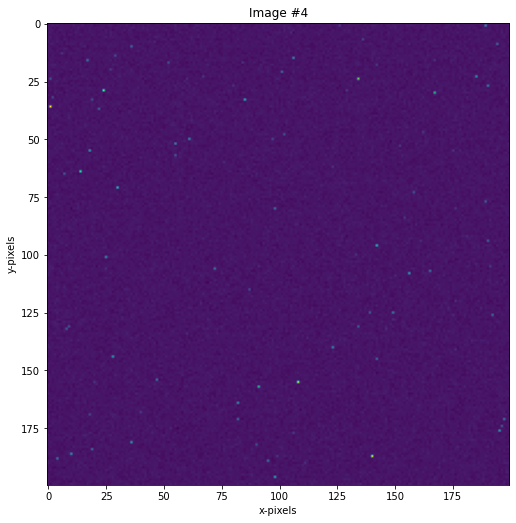

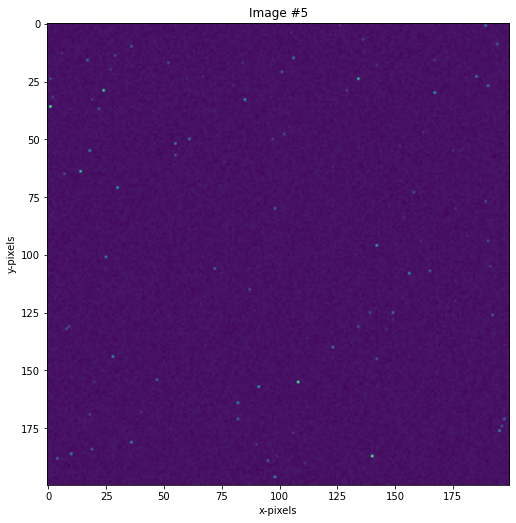

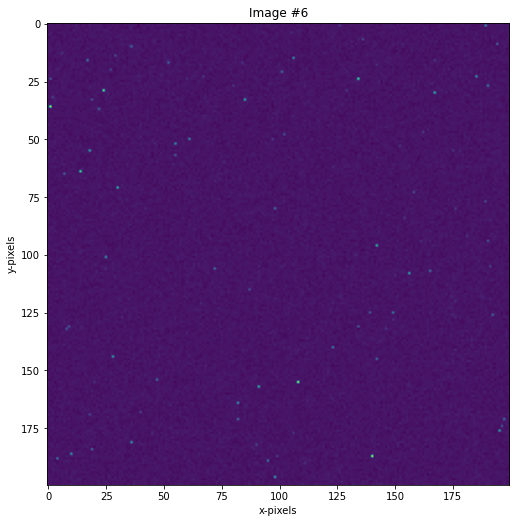

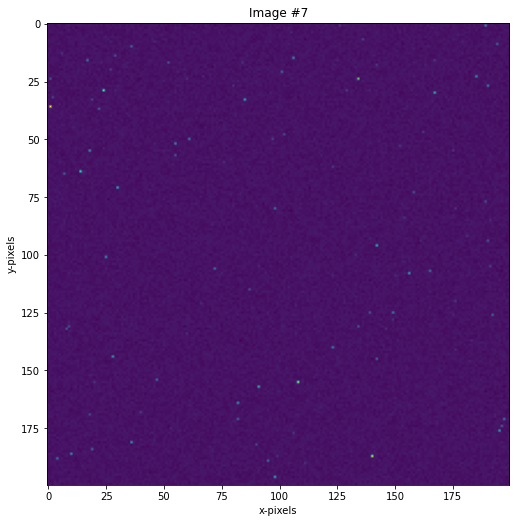

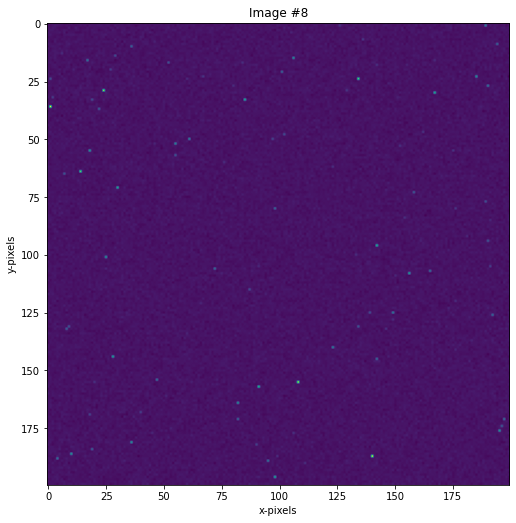

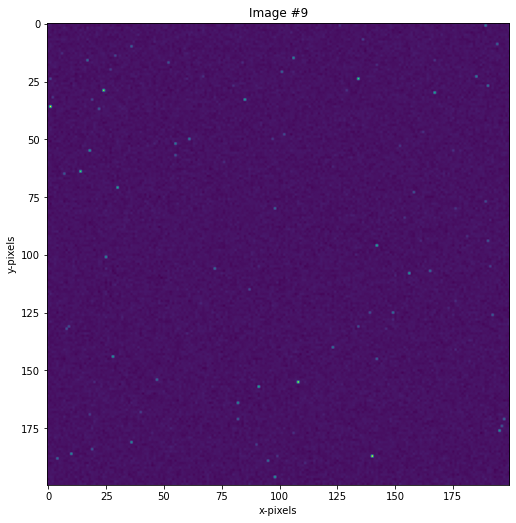

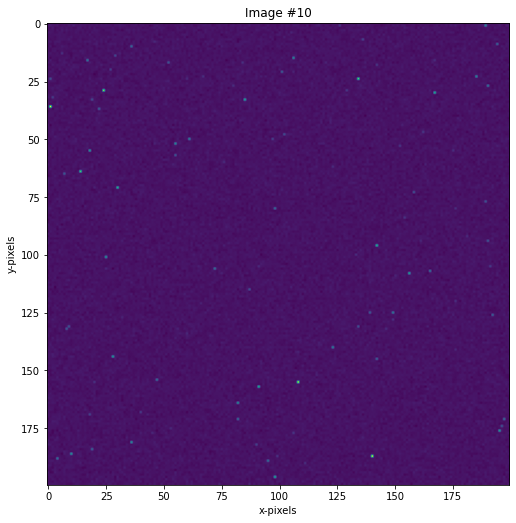

In [157]:
for i in range(10):
    plt.imshow(data2[:,:,i])
    plt.title(f'Image #{i+1}')
    plt.xlabel('x-pixels')
    plt.ylabel('y-pixels')
    plt.show()

## 2)
As we can see, the seems to be little signal contamination similar to the discontinuities from problem 1, we can say that the backgrounds are most likely not time dependent. We can see that some stars do change their brightnesess which may indicate some sort of signal contamination, but other than that I see no significant contamination in the signal.

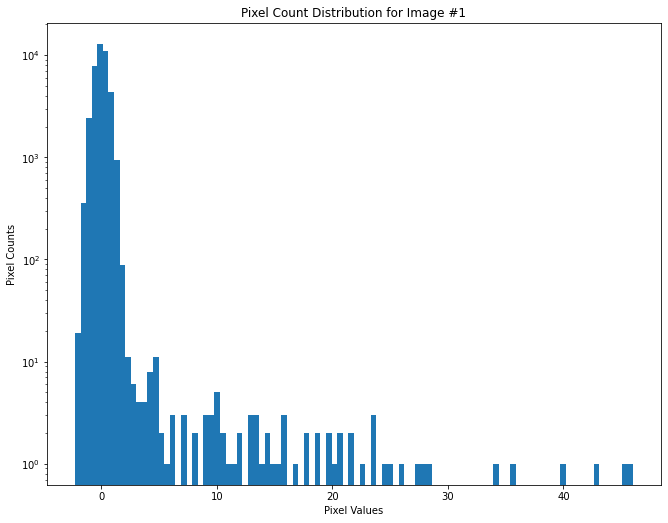

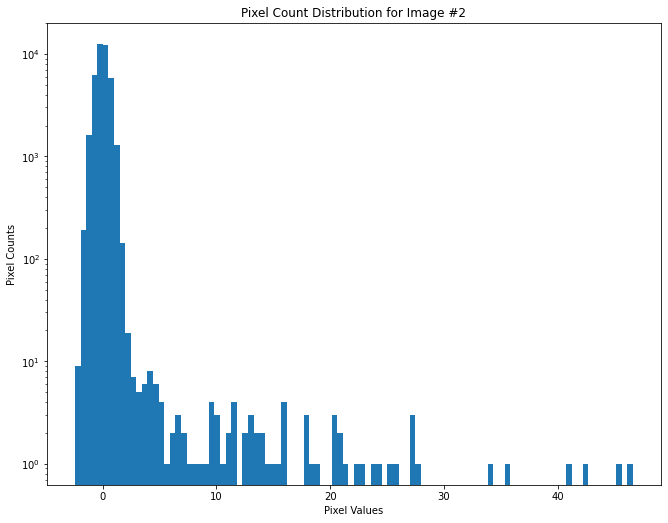

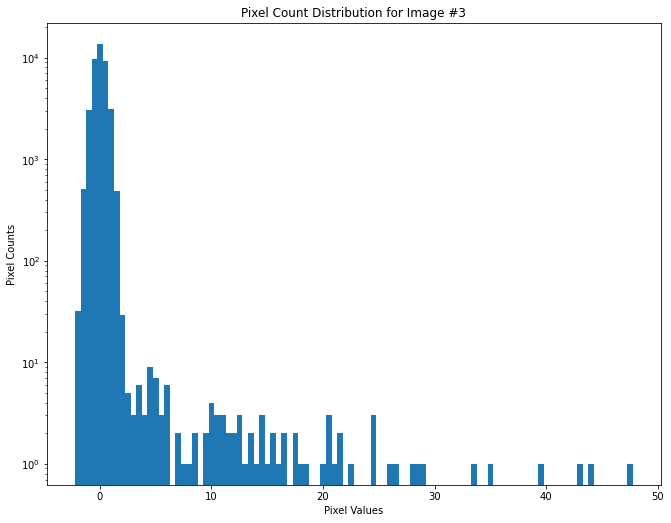

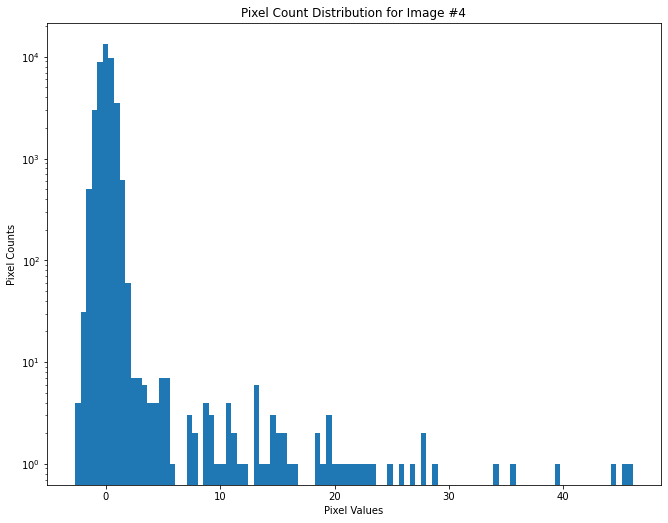

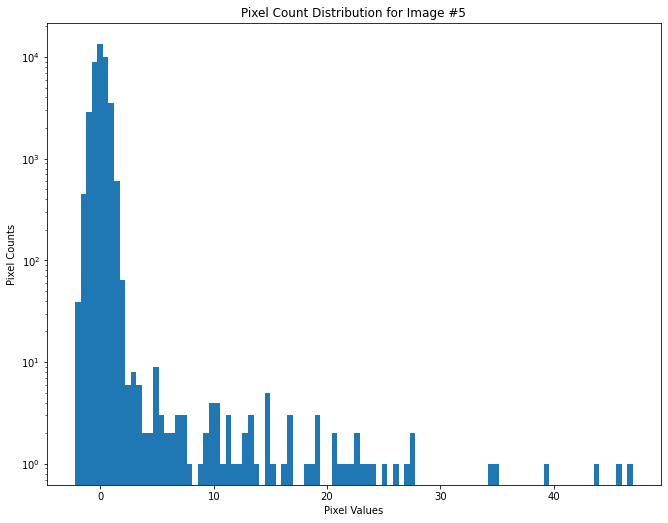

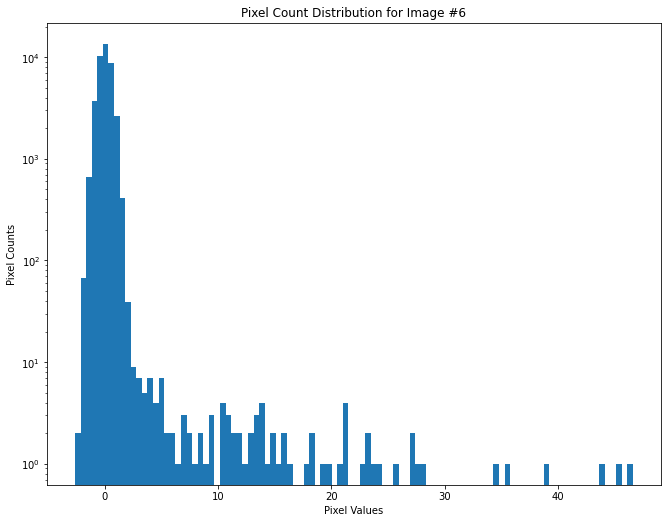

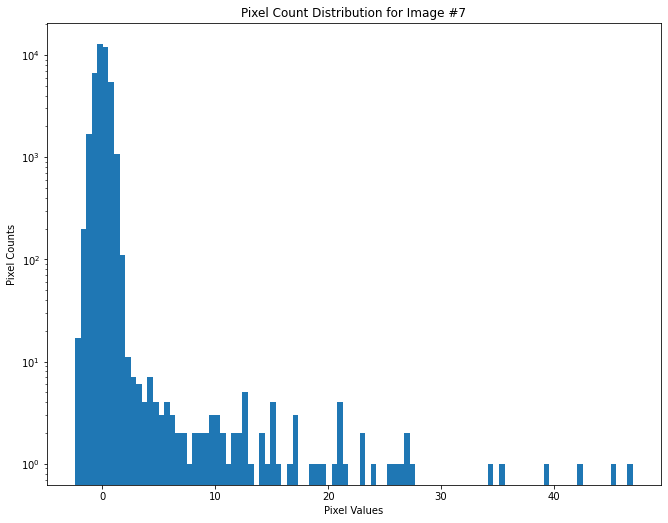

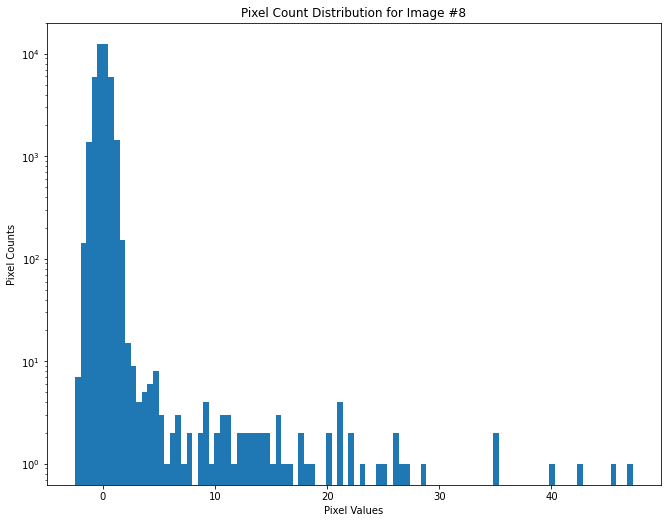

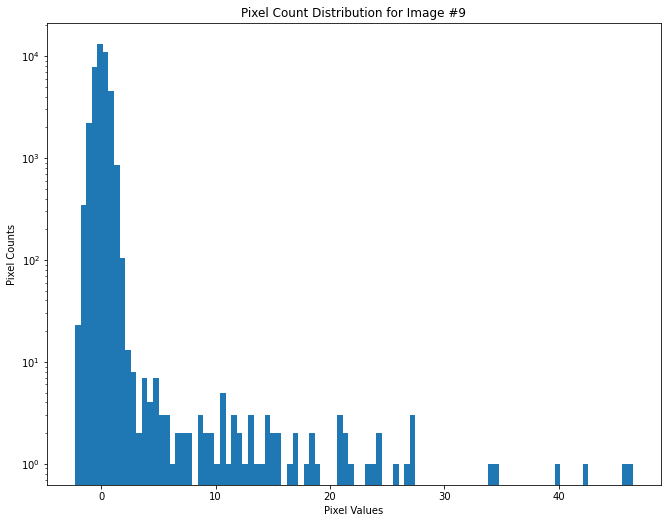

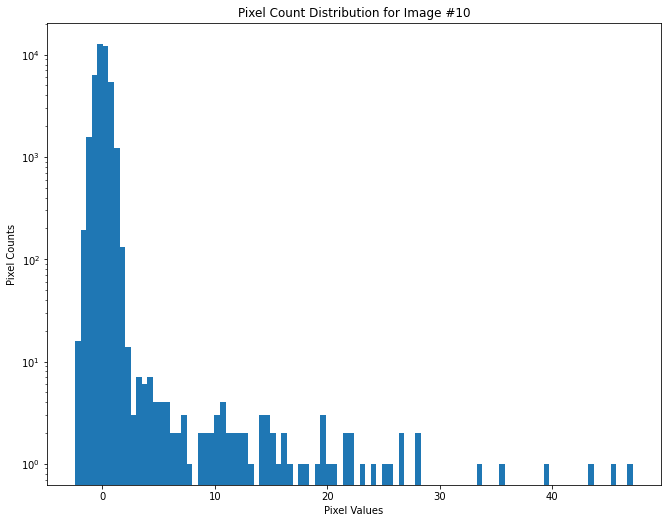

In [152]:
for i in range(10):
    pv=[]
    for j in range(200):
        pv.extend(data2[j,:,i].flatten())
    plt.hist(pv,bins=100)
    plt.title(f"Pixel Count Distribution for Image #{i+1}")
    plt.xlabel('Pixel Values')
    plt.ylabel('Pixel Counts')
    plt.yscale('log')
    plt.show()

To find the background distribution we can find an sum and average the differences from each image, this will remove the star contamination and give us a pure background which we can easily model.

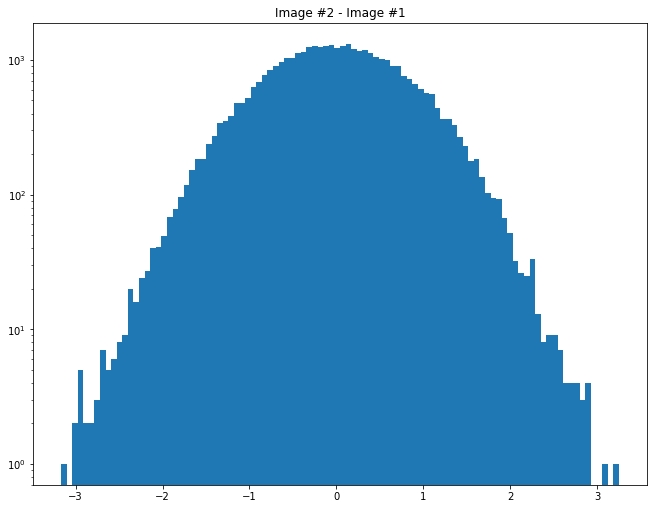

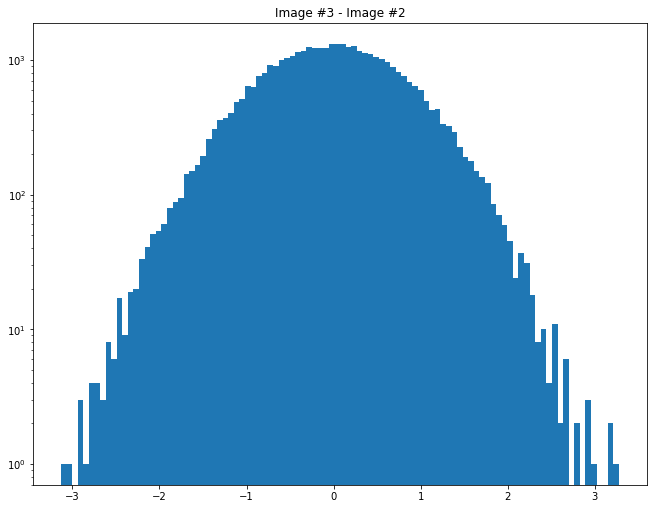

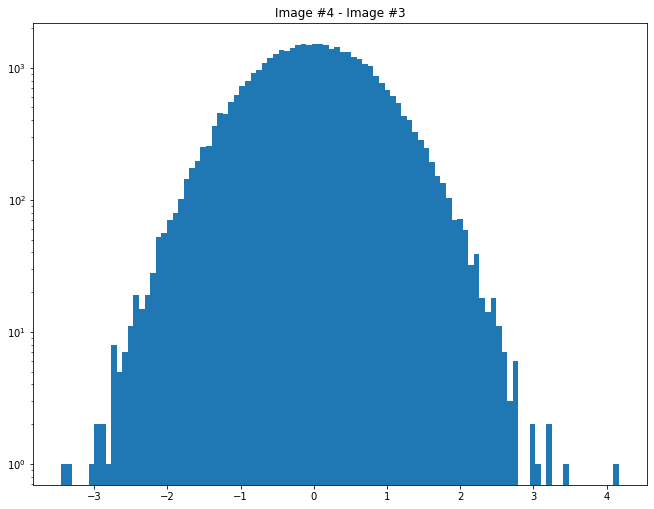

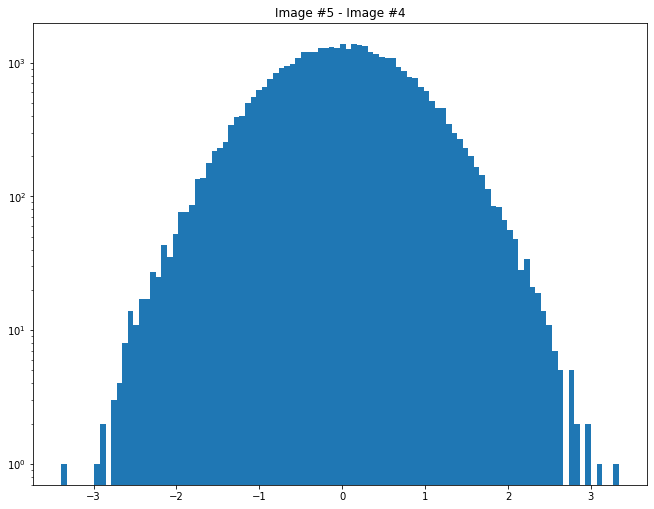

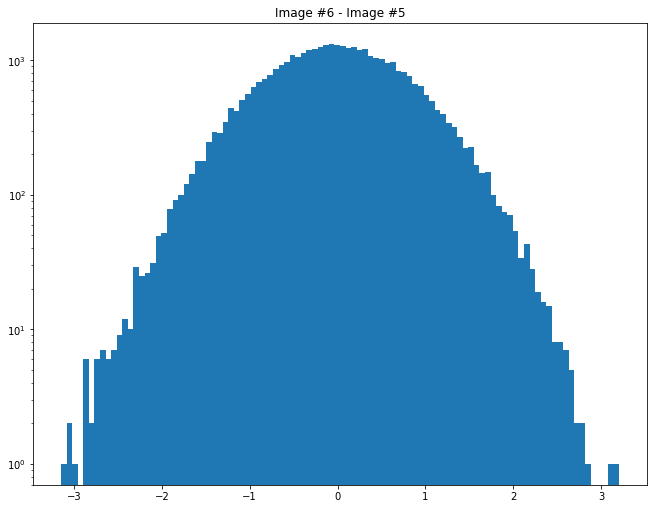

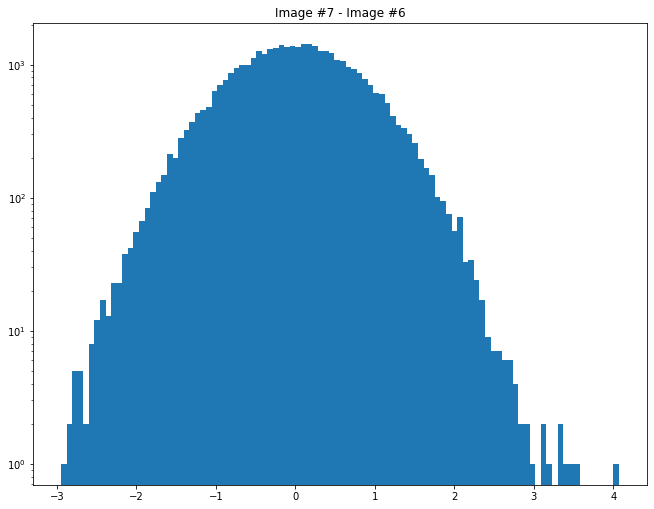

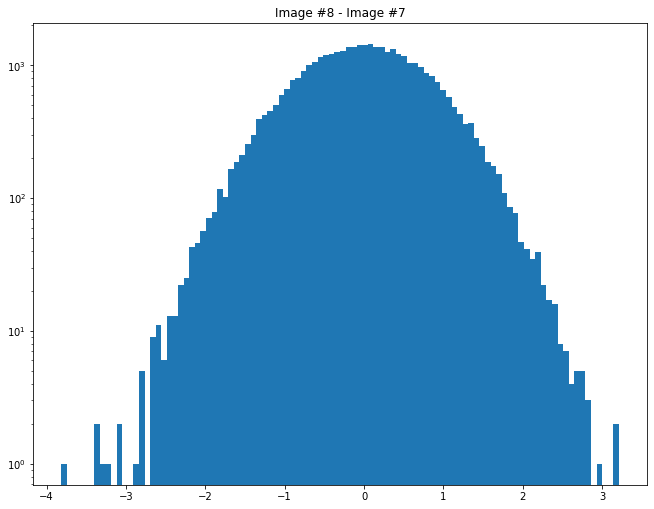

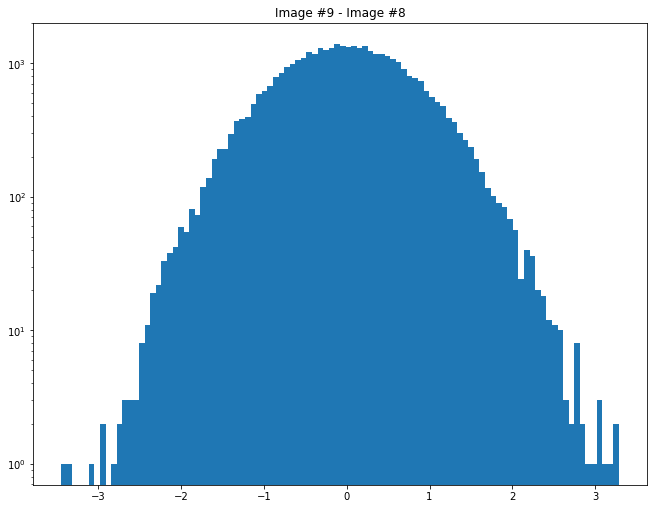

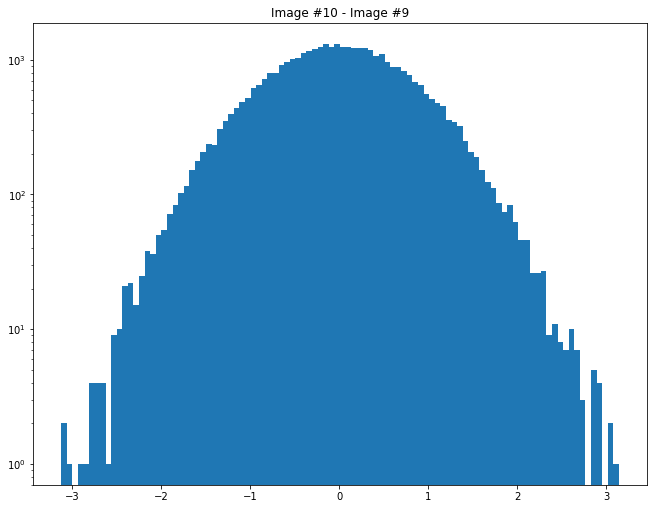

In [166]:
adiff=[]
for i in range(9):
    diff=[]
    bgp=[]
    for j in range(200):
        sub = data2[j,:,i] - data2[j,:,i+1]
        diff.extend(sub)
        bgp.append(sub)
    adiff.append(bgp)
    plt.title(f"Image #{i+2} - Image #{i+1}")
    plt.yscale('log')
    plt.hist(diff,100);
    plt.show();

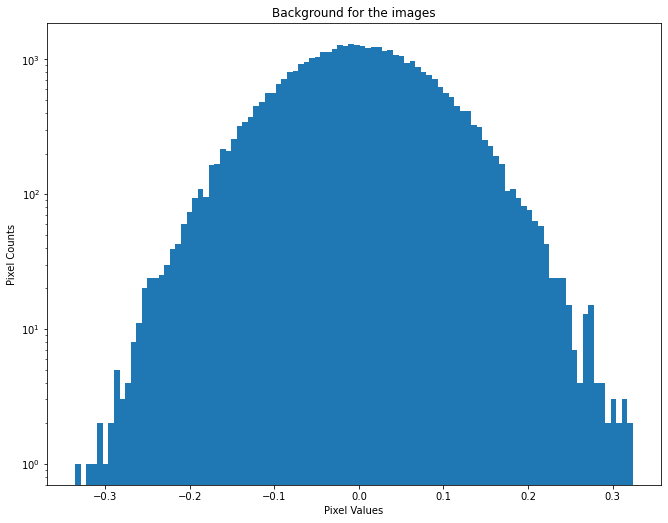

In [169]:
bd = np.zeros((200, 200))
adiff = np.array(adiff)

for i in range(9):
    for j in range(200):
        val = np.add(bd[j, :], adiff[i, j, :])
        avg = np.true_divide(val, 9)
        bd[j] = avg
        
bd_pix = []
for i in range(200):
    bd_pix.extend(bd[:, i])
fig, ax = plt.subplots(1, 1, figsize=(11, 8.5))
plt.yscale('log')
ax.hist(bd_pix, 100)
ax.set_title('Background for the images')
ax.set_xlabel('Pixel Values')
ax.set_ylabel('Pixel Counts')
plt.show()

## 3) I am looking for transients
We can use the background distribution we found before to find the location of a 5-sigma event. We know then that any location larger than a 5-sigma event is most likely a transient detection. Since we do not have a pdf of this model distribution we must integrate and sum the for the probability ourselves, since we create our own pdf integrator.

In [165]:
low_bound = 1 - stats.norm.cdf(5)

su = 0
for i in range(len(bd_pix)):
    if (su != low_bound):
        su= su + bd_pix[i]  
print(np.abs(su) / 4)

3.0475030107852925


We see here that the detection has to be at a location of 3.04 or larger from the mean to be a transient signal. This means that a pixel must change by 3.04 or larger to be considered a transient detection.

## 4)

In my search for transients I need to find the total change in the images so I can determine what is a significant change. My partner is looking for faint stars which do not change with each image but usually stay static and unchanged throughout each image. They would most likely search in different areas looking for a significant background for every image while I am looking for the differences between two images in the stack.